<a href="https://colab.research.google.com/github/it-is-nidah/dogs-vs-cats/blob/main/Dogs_vs_Cats_Redux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [39]:
import tensorflow as tf
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [79]:
# directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
# directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
# directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
 # directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
# test cat pictures directory
test_cats_dir = os.path.join(test_dir, 'cats')
# test dog pictures directory
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [53]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)



total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
Total training images: 2000
Total validation images: 1000


In [68]:
input_path = []
label = []

for class_name in os.listdir(train_dir):
    for path in os.listdir(train_dogs_dir):
        if class_name == 'cats':
            label.append(0)
        else:
            label.append(1)
        input_path.append(os.path.join(train_dir, class_name, path))
print(input_path[0], label[0])

/root/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.455.jpg 1


In [69]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/root/.keras/datasets/cats_and_dogs_filtered/t...,1
1,/root/.keras/datasets/cats_and_dogs_filtered/t...,0
2,/root/.keras/datasets/cats_and_dogs_filtered/t...,0
3,/root/.keras/datasets/cats_and_dogs_filtered/t...,1
4,/root/.keras/datasets/cats_and_dogs_filtered/t...,0


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['label'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['images'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_3, *['label', 'images'], **{'inner': 'stick'})
chart

In [91]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels


In [94]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [92]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2000 images belonging to 2 classes.


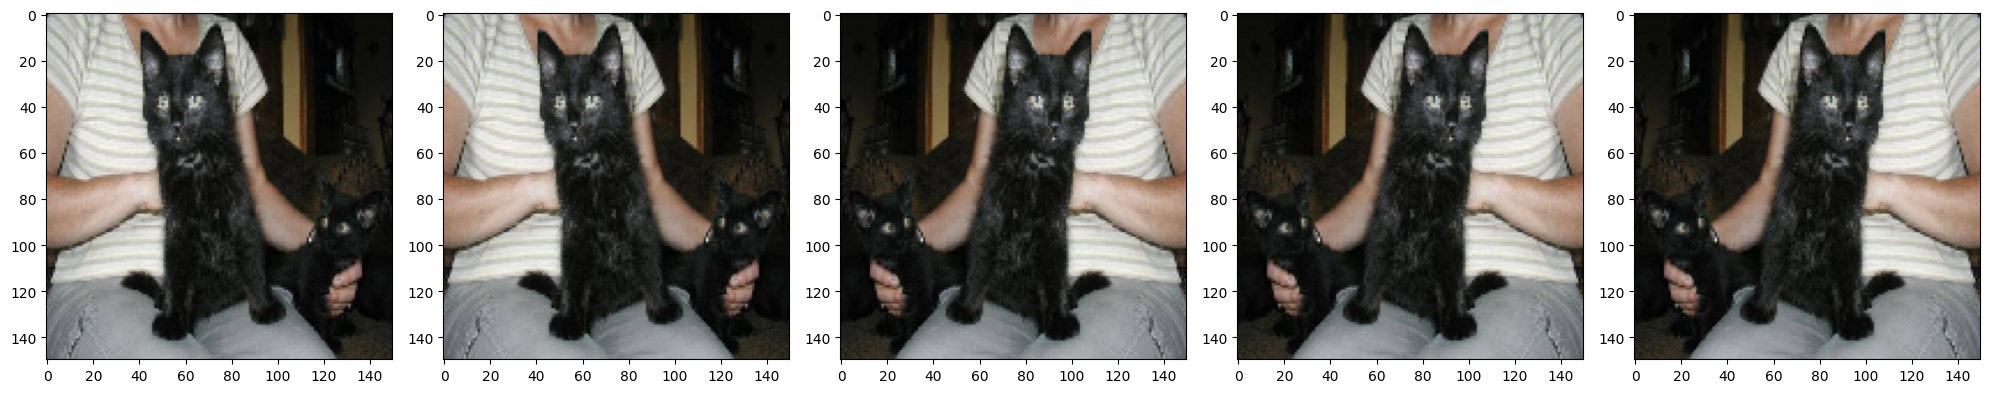

In [14]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


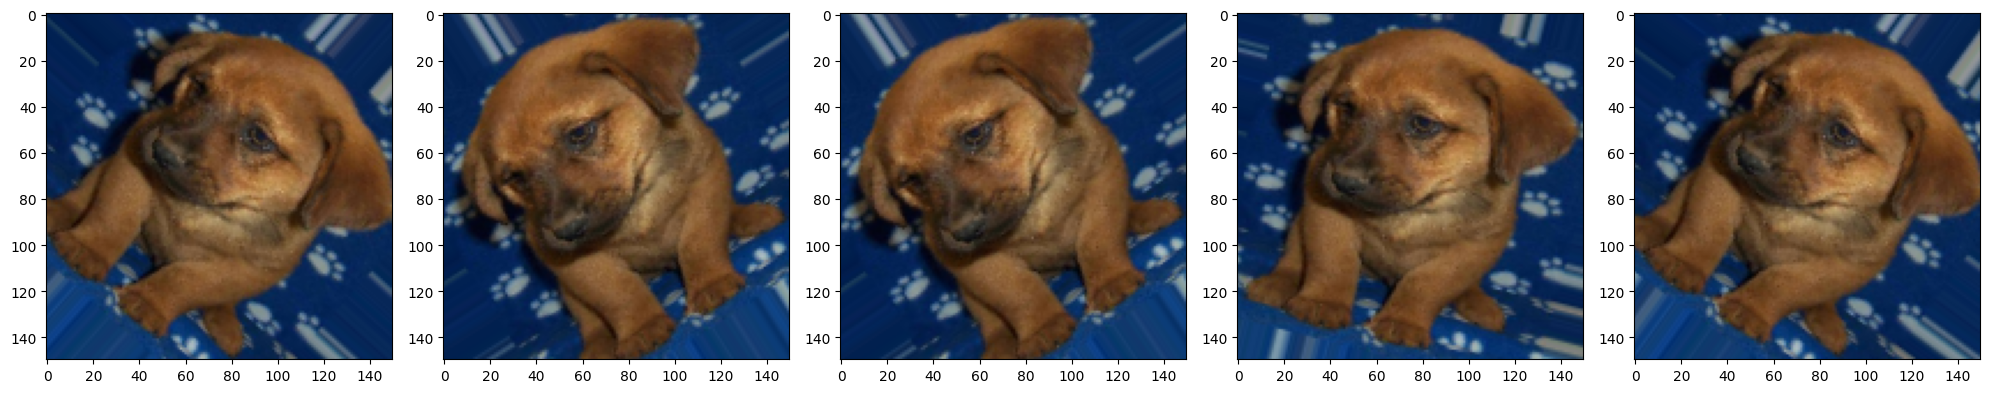

In [15]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


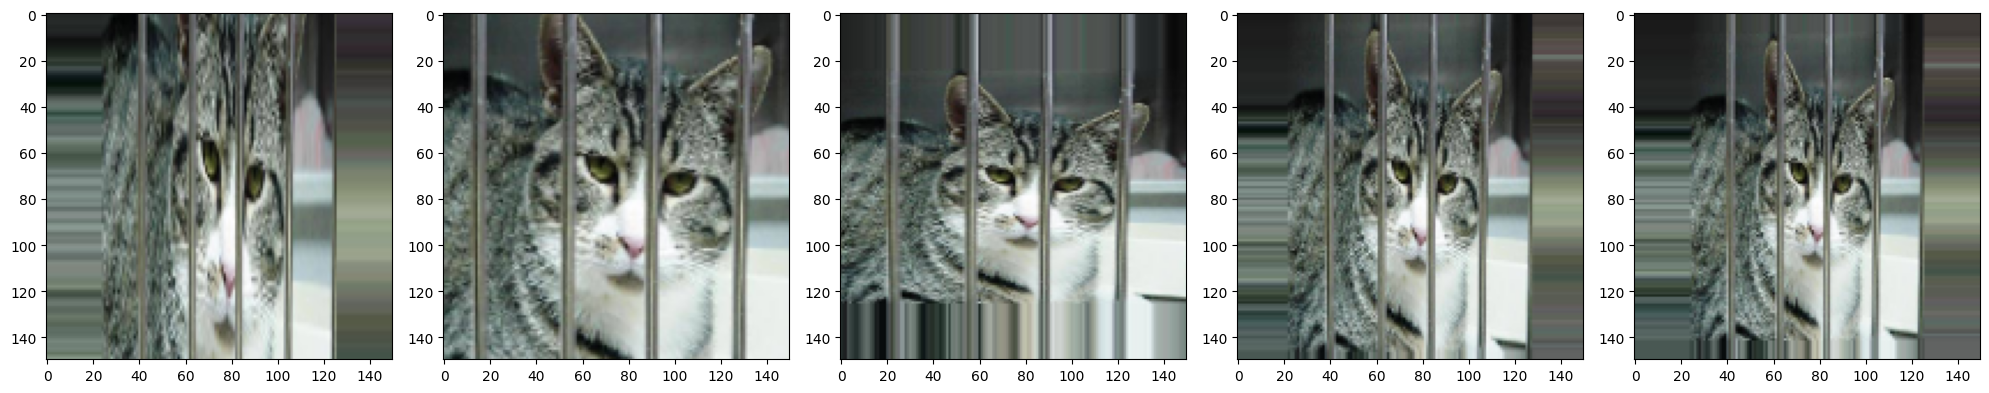

In [16]:
# zoom

image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


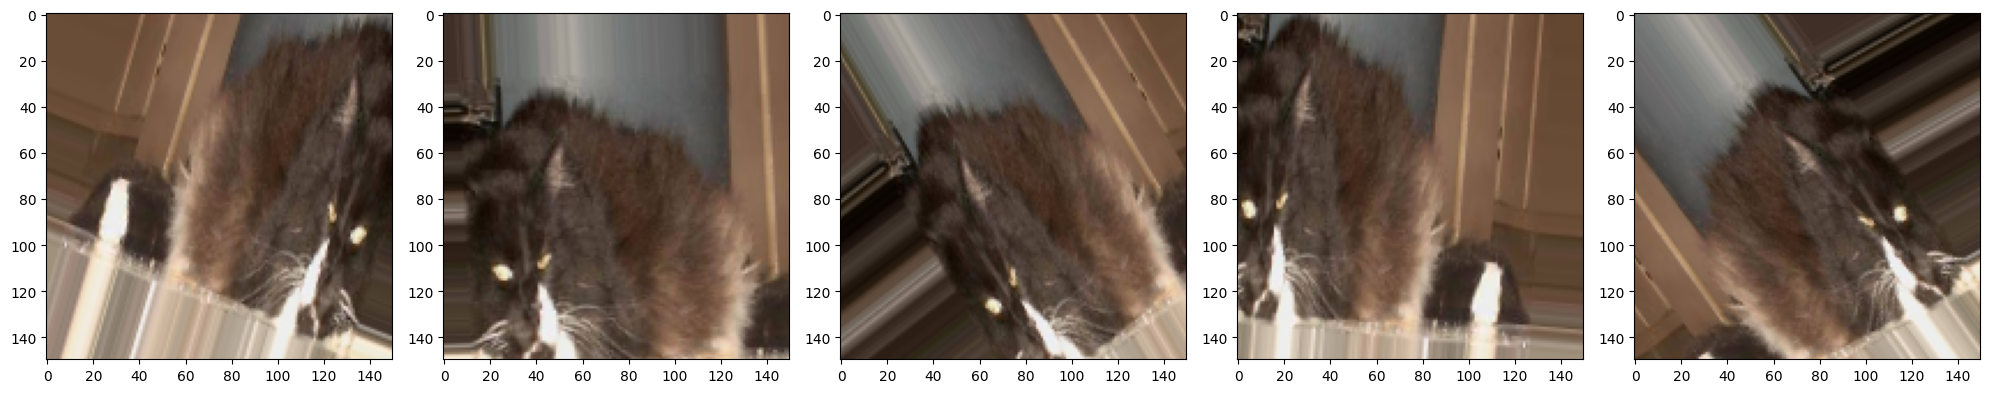

In [17]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')




augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [97]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')


Found 1000 images belonging to 2 classes.


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])


#define the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 17, 17, 128)      

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [22]:
# train the model

epochs=20
history = model.fit(
    train_data_gen,
    steps_per_epoch=len(train_data_gen),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=len(val_data_gen)
)


<ipython-input-22-72376c2e6a3e>:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/20
20/20 [==============================] - 139s 7s/step - loss: 0.5214 - accuracy: 0.7365 - val_loss: 0.5210 - val_accuracy: 0.7300
Epoch 2/20
20/20 [==============================] - 131s 7s/step - loss: 0.5310 - accuracy: 0.7275 - val_loss: 0.4937 - val_accuracy: 0.7560
Epoch 3/20
20/20 [==============================] - 133s 7s/step - loss: 0.5648 - accuracy: 0.7080 - val_loss: 0.6048 - val_accuracy: 0.6650
Epoch 4/20
20/20 [==============================] - 133s 7s/step - loss: 0.5424 - accuracy: 0.7275 - val_loss: 0.5133 - val_accuracy: 0.7370
Epoch 5/20
20/20 [==============================] - 134s 7s/step - loss: 0.5317 - accuracy: 0.7360 - val_loss: 0.4905 - val_accuracy: 0.7620
Epoch 6/20
20/20 [==============================] - 135s 7s/step - loss: 0.5179 - accuracy: 0.7450 - val_loss: 0.4910 - val_accuracy: 0.7600
Epoch 7/20
20/20 [==============================] - 135s 7s/step - loss: 0.5164 - accuracy: 0.7485 - val_loss: 0.4807 - val_accuracy: 0.7530
Epoch 8/20
20

In [29]:
history = model.fit(train_data_gen, epochs=10, validation_data=val_data_gen)

Epoch 1/10
20/20 [==============================] - 144s 7s/step - loss: 7.3251 - accuracy: 0.5055 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 144s 7s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 154s 8s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 139s 7s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 136s 7s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 6/10
20/20 [==============================] - 137s 7s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 7/10
20/20 [==============================] - 130s 7s/step - loss: 7.6685 - accuracy: 0.5000 - val_loss: 7.6685 - val_accuracy: 0.5000
Epoch 8/10
20

In [7]:
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs_range = range(epochs)

# plt.figure(figsize=(10, 10))
# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.legend(loc='lower right')
# plt.title('Training and Validation Accuracy')

# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.legend(loc='upper right')
# plt.title('Training and Validation Loss')
# plt.show()


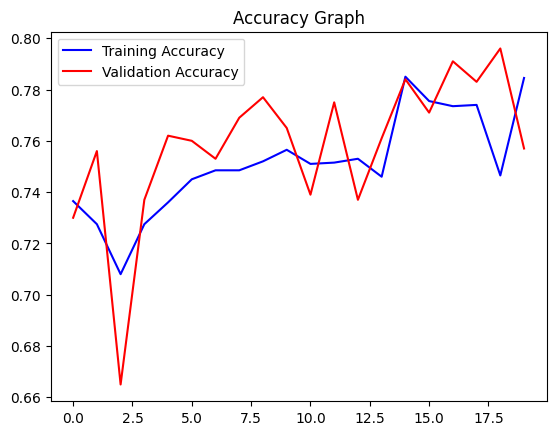

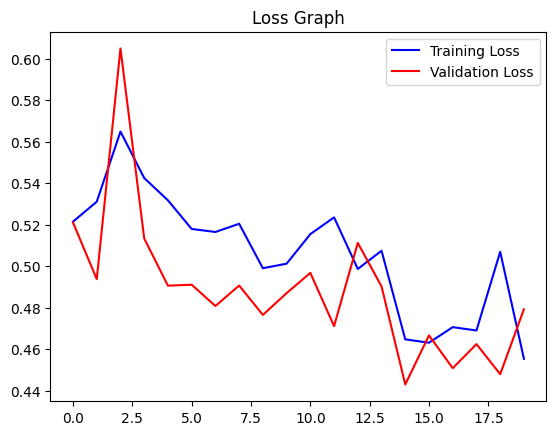

In [24]:


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()



In [90]:
model.save("model-cats_dogs")

In [110]:
# BATCH_SIZE

# loss,acc = model.evaluate(train_data_gen,batch_size = int(BATCH_SIZE), verbose = 0)

# print('The accuracy of the model for training data is:',acc*100)
# print('The Loss of the model for training data is:',loss)

# # Evaluvate for validation generator
# loss,acc = model.evaluate(val_data_gen,batch_size = int(BATCH_SIZE), verbose = 0)

# print('The accuracy of the model for validation data is:',acc*100)
# print('The Loss of the model for validation data is:',loss)

In [3]:
# train_generator = train_data_gen.flow_from_directory(
#     'train_dir',
#     target_size=(64, 64),
#     batch_size=32,
#     class_mode='binary'
# )

# history = model.fit(
#     train_generator,
#     steps_per_epoch=train_generator.samples // 32,
#     epochs=20,
#     validation_data=validation_ge,
#     validation_steps=validation_generator.samples // 32
# )


In [4]:
# import matplotlib.pyplot as plt

# plt.plot(history.history['accuracy'], label='Training Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


In [ ]:
test_generator = test_datagen.flow_from_directory(
    'test_dir',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {test_accuracy}')